In [1]:
"""
Example of building a simple shape model

"""

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_points(plt, points, style):
    pts=points.reshape(-1,2)
    plt.plot(pts[:,0],pts[:,1],style)
    

In [2]:
shapes=np.genfromtxt("pelvis_shapes(2).txt")

n_shapes=int(shapes.shape[0])
print("Number of shapes", n_shapes)
n_pts=int(shapes.shape[1]/2)
print("Number of points", n_pts)


Number of shapes 596
Number of points 12


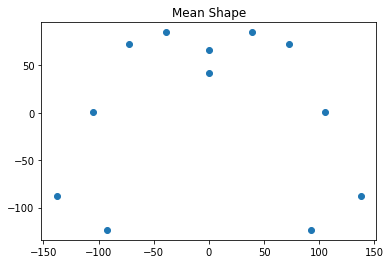

In [3]:
# Calculate the mean shape by averaging over the first dimension
mean_shape=shapes.mean(0)

plot_points(plt,mean_shape,"o")
plt.title("Mean Shape")
plt.show()

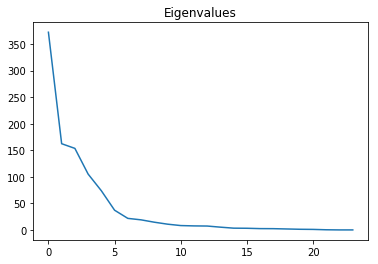

P has shape (24, 3)


In [4]:
# === Perform PCA ===
# First subtract mean from each row
D=shapes-mean_shape

# Create covariance matrix
S=D.T @ D/n_shapes

# Compute the eigenvectors and eigenvalues (arbitrary order)
evals,EVecs = np.linalg.eig(S)

# Sort by the eigenvalues (largest first)
idx = np.flip(np.argsort(evals),0)
evals = evals[idx]
EVecs = EVecs[:,idx]


# Plot the Eigenvalues against index
plt.plot(evals)
plt.title("Eigenvalues")
plt.show()

# Create a model with t modes
t=3
mode_sd=np.sqrt(evals[0:t])
P=EVecs[:,0:t]

print("P has shape",P.shape)

In [5]:
# Plot the effect of the first mode
# Generate shape with +/- SD
b=np.array([1,0,0]) * mode_sd

points1=mean_shape + P@b
points2=mean_shape - P@b


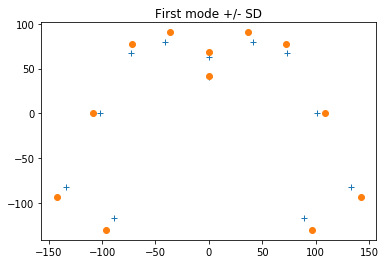

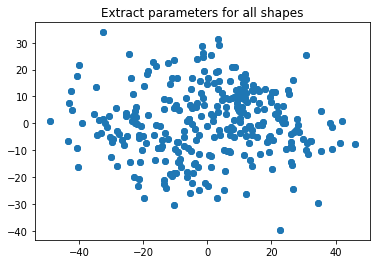

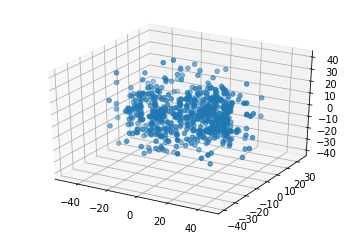

In [6]:
plot_points(plt,points1,"+")
plot_points(plt,points2,"o")
#plot_points(plt,mean_shape,"s")
plt.title("First mode +/- SD")
plt.show()

# Extract parameters for all shapes
B=P.T@D.T
plt.plot(B[0,:],B[1,:],"o")
plt.title("Extract parameters for all shapes")
plt.show()

# Show the scatter of the first three parameters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(B[0,:],B[1,:],B[2,:])